:**analysing reviews for our top performer shop in its subcategory**


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import glob ## to combine and analysie too many csv files
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/cv'

In [ ]:
reviews= glob.glob(path+"/*.csv")

In [ ]:
list_1=[pd.read_csv(filename,index_col=False,header=0) for filename in reviews]

In [ ]:
reviews=pd.concat(list_1,axis=0,ignore_index=True)

In [ ]:
reviews

,customer_name,review_date,item_title,item_link,item_rating,review_text
0,Pia,"\nPia on Nov 13, 2021\n","Board Personalized, Personalized Gift Baby, Ba...",/listing/985046343/board-personalized-personal...,5 out of 5 stars,NaN
1,Pally,"\nPally on Nov 13, 2021\n","Lunch box personalized, Lunch box children, Pe...",/listing/1041303149/lunch-box-personalized-lun...,5 out of 5 stars,Sehr schön und eine tolle Geschenkidee
2,Karina,"\nKarina on Nov 13, 2021\n","Personalized Gifts, Breakfast Board Personaliz...",/listing/1006900911/personalized-gifts-breakfa...,5 out of 5 stars,Super geworden! Großes Lob!
3,Judith,"\nJudith on Nov 13, 2021\n","Thank you teacher gift, personalized lunch box...",/listing/1028025656/thank-you-teacher-gift-per...,5 out of 5 stars,"Diese Leherbox kam richtig gut an. Danke, für ..."
4,inawolters1,"\ninawolters1 on Nov 13, 2021\n ...","Breakfast Board Kids, Personalized Gift Baby, ...",/listing/1006900911/personalized-gifts-breakfa...,5 out of 5 stars,NaN
...,...,...,...,...,...,...
3271,Julia,"\nJulia on Jun 13, 2020\n","Behelfsmaske Kinder & Erwachsene - Paw Patrol,...",/listing/790477478/mask-kids-adult-mask-owl-pe...,5 out of 5 stars,NaN
3272,Claudia,"\nClaudia on Jun 11, 2020\n",Minnie Mouse Behelfsmaske Mundschutz Kinder & ...,/listing/792462098/minnie-mouse-makeshift-mask...,5 out of 5 stars,Danke für diese wunderschöne maske meine Tocht...
3273,Brigitta,"\nBrigitta on Jun 10, 2020\n",Vintage Pattern Mouth cover Makeshift Mask Pro...,/listing/794765192/vintage-pattern-mouth-cover...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!
3274,Brigitta,"\nBrigitta on Jun 10, 2020\n",Makeshift Mask Face Protection Bambi Rehkitz K...,/listing/793604826/makeshift-mask-face-protect...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!


In [ ]:
reviews['item_link'] = 'www.etsy.com' + reviews['item_link'].astype(str)

In [ ]:
df=pd.DataFrame(reviews['review_date']) 

In [ ]:
df

,review_date
0,"\nPia on Nov 13, 2021\n"
1,"\nPally on Nov 13, 2021\n"
2,"\nKarina on Nov 13, 2021\n"
3,"\nJudith on Nov 13, 2021\n"
4,"\ninawolters1 on Nov 13, 2021\n ..."
...,...
3271,"\nJulia on Jun 13, 2020\n"
3272,"\nClaudia on Jun 11, 2020\n"
3273,"\nBrigitta on Jun 10, 2020\n"
3274,"\nBrigitta on Jun 10, 2020\n"


In [ ]:
reviews['review_date']= reviews['review_date'].str.extract(r'(([\d]+)([\-\./])([\d]+)([\-\./])([\d]+)|((Jan(|uary)|Feb(|ruary)|Mar(|ch)|Apr(|il)|May|Jun(|e)|Jul(|y)|Aug(|ust)|Sept(|ember)|Oct(|ober)|(Nov|Dec)(|ember))([\s\-])(|([\d]+){1,2}([\s\-]|\, ))([\d]+){4}))', expand=False)

In [ ]:
reviews

,customer_name,review_date,item_title,item_link,item_rating,review_text
0,Pia,"Nov 13, 2021","Board Personalized, Personalized Gift Baby, Ba...",www.etsy.com/listing/985046343/board-personali...,5 out of 5 stars,NaN
1,Pally,"Nov 13, 2021","Lunch box personalized, Lunch box children, Pe...",www.etsy.com/listing/1041303149/lunch-box-pers...,5 out of 5 stars,Sehr schön und eine tolle Geschenkidee
2,Karina,"Nov 13, 2021","Personalized Gifts, Breakfast Board Personaliz...",www.etsy.com/listing/1006900911/personalized-g...,5 out of 5 stars,Super geworden! Großes Lob!
3,Judith,"Nov 13, 2021","Thank you teacher gift, personalized lunch box...",www.etsy.com/listing/1028025656/thank-you-teac...,5 out of 5 stars,"Diese Leherbox kam richtig gut an. Danke, für ..."
4,inawolters1,"Nov 13, 2021","Breakfast Board Kids, Personalized Gift Baby, ...",www.etsy.com/listing/1006900911/personalized-g...,5 out of 5 stars,NaN
...,...,...,...,...,...,...
3271,Julia,"Jun 13, 2020","Behelfsmaske Kinder & Erwachsene - Paw Patrol,...",www.etsy.com/listing/790477478/mask-kids-adult...,5 out of 5 stars,NaN
3272,Claudia,"Jun 11, 2020",Minnie Mouse Behelfsmaske Mundschutz Kinder & ...,www.etsy.com/listing/792462098/minnie-mouse-ma...,5 out of 5 stars,Danke für diese wunderschöne maske meine Tocht...
3273,Brigitta,"Jun 10, 2020",Vintage Pattern Mouth cover Makeshift Mask Pro...,www.etsy.com/listing/794765192/vintage-pattern...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!
3274,Brigitta,"Jun 10, 2020",Makeshift Mask Face Protection Bambi Rehkitz K...,www.etsy.com/listing/793604826/makeshift-mask-...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!


In [ ]:
reviews['review_date']=reviews['review_date'].replace(',','', regex=True)

In [ ]:
reviews

,customer_name,review_date,item_title,item_link,item_rating,review_text
0,Pia,Nov 13 2021,"Board Personalized, Personalized Gift Baby, Ba...",www.etsy.com/listing/985046343/board-personali...,5 out of 5 stars,NaN
1,Pally,Nov 13 2021,"Lunch box personalized, Lunch box children, Pe...",www.etsy.com/listing/1041303149/lunch-box-pers...,5 out of 5 stars,Sehr schön und eine tolle Geschenkidee
2,Karina,Nov 13 2021,"Personalized Gifts, Breakfast Board Personaliz...",www.etsy.com/listing/1006900911/personalized-g...,5 out of 5 stars,Super geworden! Großes Lob!
3,Judith,Nov 13 2021,"Thank you teacher gift, personalized lunch box...",www.etsy.com/listing/1028025656/thank-you-teac...,5 out of 5 stars,"Diese Leherbox kam richtig gut an. Danke, für ..."
4,inawolters1,Nov 13 2021,"Breakfast Board Kids, Personalized Gift Baby, ...",www.etsy.com/listing/1006900911/personalized-g...,5 out of 5 stars,NaN
...,...,...,...,...,...,...
3271,Julia,Jun 13 2020,"Behelfsmaske Kinder & Erwachsene - Paw Patrol,...",www.etsy.com/listing/790477478/mask-kids-adult...,5 out of 5 stars,NaN
3272,Claudia,Jun 11 2020,Minnie Mouse Behelfsmaske Mundschutz Kinder & ...,www.etsy.com/listing/792462098/minnie-mouse-ma...,5 out of 5 stars,Danke für diese wunderschöne maske meine Tocht...
3273,Brigitta,Jun 10 2020,Vintage Pattern Mouth cover Makeshift Mask Pro...,www.etsy.com/listing/794765192/vintage-pattern...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!
3274,Brigitta,Jun 10 2020,Makeshift Mask Face Protection Bambi Rehkitz K...,www.etsy.com/listing/793604826/makeshift-mask-...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!


In [ ]:
 reviews['review_date']= pd.to_datetime(reviews['review_date'])

In [ ]:
reviews

,customer_name,review_date,item_title,item_link,item_rating,review_text
0,Pia,2021-11-13,"Board Personalized, Personalized Gift Baby, Ba...",www.etsy.com/listing/985046343/board-personali...,5 out of 5 stars,NaN
1,Pally,2021-11-13,"Lunch box personalized, Lunch box children, Pe...",www.etsy.com/listing/1041303149/lunch-box-pers...,5 out of 5 stars,Sehr schön und eine tolle Geschenkidee
2,Karina,2021-11-13,"Personalized Gifts, Breakfast Board Personaliz...",www.etsy.com/listing/1006900911/personalized-g...,5 out of 5 stars,Super geworden! Großes Lob!
3,Judith,2021-11-13,"Thank you teacher gift, personalized lunch box...",www.etsy.com/listing/1028025656/thank-you-teac...,5 out of 5 stars,"Diese Leherbox kam richtig gut an. Danke, für ..."
4,inawolters1,2021-11-13,"Breakfast Board Kids, Personalized Gift Baby, ...",www.etsy.com/listing/1006900911/personalized-g...,5 out of 5 stars,NaN
...,...,...,...,...,...,...
3271,Julia,2020-06-13,"Behelfsmaske Kinder & Erwachsene - Paw Patrol,...",www.etsy.com/listing/790477478/mask-kids-adult...,5 out of 5 stars,NaN
3272,Claudia,2020-06-11,Minnie Mouse Behelfsmaske Mundschutz Kinder & ...,www.etsy.com/listing/792462098/minnie-mouse-ma...,5 out of 5 stars,Danke für diese wunderschöne maske meine Tocht...
3273,Brigitta,2020-06-10,Vintage Pattern Mouth cover Makeshift Mask Pro...,www.etsy.com/listing/794765192/vintage-pattern...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!
3274,Brigitta,2020-06-10,Makeshift Mask Face Protection Bambi Rehkitz K...,www.etsy.com/listing/793604826/makeshift-mask-...,5 out of 5 stars,Wunderschön und sehr gut genäht. Danke!


In [ ]:
reviews.to_csv(r'/content/drive\complete.csv')

In [ ]:
print(type(df['review_date'].value_counts()))

<class 'pandas.core.series.Series'>


In [ ]:
review_sale_count= df['review_date'].value_counts().to_frame()

In [ ]:
review_sale_count

,review_date
"Oct 29, 2021",44
"Nov 13, 2021",40
"Aug 18, 2021",31
"Oct 6, 2021",28
"Aug 25, 2021",28
...,...
"Oct 12, 2020",1
"Nov 18, 2020",1
"Dec 20, 2020",1
"Nov 23, 2020",1


In [ ]:
day= range(304)
review_sale_count['day']=day


In [ ]:
review_sale_count

,review_date,day
"Oct 29, 2021",44,0
"Nov 13, 2021",40,1
"Aug 18, 2021",31,2
"Oct 6, 2021",28,3
"Aug 25, 2021",28,4
...,...,...
"Oct 12, 2020",1,299
"Nov 18, 2020",1,300
"Dec 20, 2020",1,301
"Nov 23, 2020",1,302


on average wunderwunsch gets 15 sale daily (generally speaking) since he opened

In [ ]:
average_daily_shop_sale=review_sale_count[0:304]

Text(0.5, 0, 'day number')

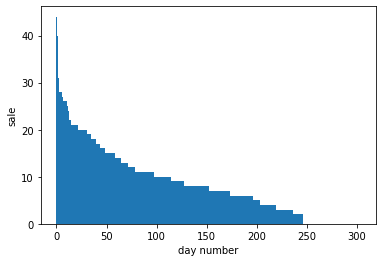

In [ ]:
plt.bar(review_sale_count.day,review_sale_count.review_date )
plt.ylabel('sale')
plt.xlabel('day number')


In [ ]:
df.insert(0, 'item_link',reviews['item_link'])
df.insert(1, 'item_title',reviews['item_title'])
df.insert(2, 'review_text', reviews['review_text'])

In [ ]:
df

,item_link,item_title,review_text,review_date
0,www.etsy.com/listing/985046343/board-personali...,"Board Personalized, Personalized Gift Baby, Ba...",NaN,"Nov 13, 2021"
1,www.etsy.com/listing/1041303149/lunch-box-pers...,"Lunch box personalized, Lunch box children, Pe...",Sehr schön und eine tolle Geschenkidee,"Nov 13, 2021"
2,www.etsy.com/listing/1006900911/personalized-g...,"Personalized Gifts, Breakfast Board Personaliz...",Super geworden! Großes Lob!,"Nov 13, 2021"
3,www.etsy.com/listing/1028025656/thank-you-teac...,"Thank you teacher gift, personalized lunch box...","Diese Leherbox kam richtig gut an. Danke, für ...","Nov 13, 2021"
4,www.etsy.com/listing/1006900911/personalized-g...,"Breakfast Board Kids, Personalized Gift Baby, ...",NaN,"Nov 13, 2021"
...,...,...,...,...
3271,www.etsy.com/listing/790477478/mask-kids-adult...,"Behelfsmaske Kinder & Erwachsene - Paw Patrol,...",NaN,"Jun 13, 2020"
3272,www.etsy.com/listing/792462098/minnie-mouse-ma...,Minnie Mouse Behelfsmaske Mundschutz Kinder & ...,Danke für diese wunderschöne maske meine Tocht...,"Jun 11, 2020"
3273,www.etsy.com/listing/794765192/vintage-pattern...,Vintage Pattern Mouth cover Makeshift Mask Pro...,Wunderschön und sehr gut genäht. Danke!,"Jun 10, 2020"
3274,www.etsy.com/listing/793604826/makeshift-mask-...,Makeshift Mask Face Protection Bambi Rehkitz K...,Wunderschön und sehr gut genäht. Danke!,"Jun 10, 2020"


In [ ]:
print(type(df.value_counts()))

<class 'pandas.core.series.Series'>


In [ ]:
df_count= df.value_counts().to_frame()

In [ ]:
df_count

0
item_link                                          item_title                                         review_text                                        review_date    
www.etsy.com/listing/939877671/personalized-bre... personalized breakfast board for children, boar... Tolle Ware und schnelle Lieferung. Diesen Shop ... May 5, 2021   4
www.etsy.com/listing/1038839157/thank-you-educa... Thank you educator, Personalized lunch box, Edu... Eine ganz tolle Box, die bei den Beschenkten (A... Aug 3, 2021   3
www.etsy.com/listing/1045853315/xxl-lunch-box-p... XXL lunch box personalized, lunch box children,... Einfach klasse. Eine sehr nette Kommunikation, ... Aug 20, 2021  3
www.etsy.com/listing/985046343/board-personaliz... Board Personalized, Personalized Gift Baby, Bab... Schönes Design. Tolles Brettchen. Liebevolle Ve... Nov 13, 2021  3
                                                   Wooden board with engraving, breakfast board ki... Ich habe 3 Brettchen mit Löffel als Geschenk fü... Oct 6, 2021   3
...                                                                                                                                                                   ..
www.etsy.com/listing/958345675/breakfast-boards... Breakfast boards for kids personalized, board b... Alles wirklich toll gelaufen, 6 brettchen sind ... Mar 14, 2021  1
                                                                                                      Ganz bezaubernd und toll gearbeitet.               Aug 4, 2021   1
                                                                                                      Wirklich ganz bezaubernde Arbeit! Wir haben uns... Mar 9, 2021   1
                                                                                                      schöne Qualität und süßes Design!                  Mar 29, 2021  1
www.etsy.com/listing/1001031605/personalized-br... personalized breakfast board, gift granddad, gi... Ich habe ein eigenes Motiv gravieren lassen und... Nov 1, 2021   1

[1571 rows x 1 columns]

In [ ]:
final_count=pd.read_csv('final.csv')

In [ ]:
final_count

,item_link,item_title,review_text,review_date,0
0,www.etsy.com/listing/939877671/personalized-br...,"personalized breakfast board for children, boa...",Tolle Ware und schnelle Lieferung. Diesen Shop...,"May 5, 2021",4
1,www.etsy.com/listing/1038839157/thank-you-educ...,"Thank you educator, Personalized lunch box, Ed...","Eine ganz tolle Box, die bei den Beschenkten (...","Aug 3, 2021",3
2,www.etsy.com/listing/1045853315/xxl-lunch-box-...,"XXL lunch box personalized, lunch box children...","Einfach klasse. Eine sehr nette Kommunikation,...","Aug 20, 2021",3
3,www.etsy.com/listing/985046343/board-personali...,"Board Personalized, Personalized Gift Baby, Ba...",Schönes Design. Tolles Brettchen. Liebevolle V...,"Nov 13, 2021",3
4,www.etsy.com/listing/985046343/board-personali...,"Wooden board with engraving, breakfast board k...",Ich habe 3 Brettchen mit Löffel als Geschenk f...,"Oct 6, 2021",3
...,...,...,...,...,...
1566,www.etsy.com/listing/958345675/breakfast-board...,"Breakfast boards for kids personalized, board ...","Alles wirklich toll gelaufen, 6 brettchen sind...","Mar 14, 2021",1
1567,www.etsy.com/listing/958345675/breakfast-board...,"Breakfast boards for kids personalized, board ...",Ganz bezaubernd und toll gearbeitet.,"Aug 4, 2021",1
1568,www.etsy.com/listing/958345675/breakfast-board...,"Breakfast boards for kids personalized, board ...",Wirklich ganz bezaubernde Arbeit! Wir haben un...,"Mar 9, 2021",1
1569,www.etsy.com/listing/958345675/breakfast-board...,"Breakfast boards for kids personalized, board ...",schöne Qualität und süßes Design!,"Mar 29, 2021",1


In [ ]:
result = final_count['item_link'].value_counts().to_frame()
result

,item_link
www.etsy.com/listing/985046343/board-personalized-personalized-gift?ref=shop_review,175
www.etsy.com/listing/932376212/wooden-board-with-engraving-breakfast?ref=shop_review,149
www.etsy.com/listing/1006900911/personalized-gifts-breakfast-board?ref=shop_review,79
www.etsy.com/listing/963721530/personalized-breakfast-board-for?ref=shop_review,65
www.etsy.com/listing/934796119/childrens-cutlery-with-name-baby-gift?ref=shop_review,61
...,...
www.etsy.com/listing/794638168/dino-mask-kids-jurassic-park-mask?ref=shop_review,1
www.etsy.com/listing/1074027358/lunch-box-with-name-lunch-box?ref=shop_review,1
www.etsy.com/listing/846853631/mask-adult-mask-kids-face-mask-makeshift?ref=shop_review,1
www.etsy.com/listing/960509145/breakfast-board-easter-easter-gift?ref=shop_review,1


In [ ]:
result.iloc[25]

item_link        14
comment_count    25
Name: www.etsy.com/listing/1052687483/wooden-board-with-engraving-breakfast?ref=shop_review, dtype: int64

In [ ]:
comment_count= range(190)

In [ ]:
result['comment_count']=comment_count

In [ ]:
creme_la_creme=result[0:25]

plotting our top best seller that got almost all sales #with only 300 reviews and 175 comment

Text(0.5, 0, 'product as a numberlabel')

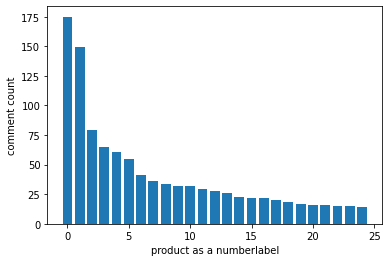

In [ ]:
plt.bar(creme_la_creme.comment_count,creme_la_creme.item_link )
plt.ylabel('comment count')
plt.xlabel('product as a numberlabel')

In [ ]:
zero= df.fillna(0)

In [ ]:
zero

,item_link,item_title,review_text,review_date
0,www.etsy.com/listing/985046343/board-personali...,"Board Personalized, Personalized Gift Baby, Ba...",0,"Nov 13, 2021"
1,www.etsy.com/listing/1041303149/lunch-box-pers...,"Lunch box personalized, Lunch box children, Pe...",Sehr schön und eine tolle Geschenkidee,"Nov 13, 2021"
2,www.etsy.com/listing/1006900911/personalized-g...,"Personalized Gifts, Breakfast Board Personaliz...",Super geworden! Großes Lob!,"Nov 13, 2021"
3,www.etsy.com/listing/1028025656/thank-you-teac...,"Thank you teacher gift, personalized lunch box...","Diese Leherbox kam richtig gut an. Danke, für ...","Nov 13, 2021"
4,www.etsy.com/listing/1006900911/personalized-g...,"Breakfast Board Kids, Personalized Gift Baby, ...",0,"Nov 13, 2021"
...,...,...,...,...
3271,www.etsy.com/listing/790477478/mask-kids-adult...,"Behelfsmaske Kinder & Erwachsene - Paw Patrol,...",0,"Jun 13, 2020"
3272,www.etsy.com/listing/792462098/minnie-mouse-ma...,Minnie Mouse Behelfsmaske Mundschutz Kinder & ...,Danke für diese wunderschöne maske meine Tocht...,"Jun 11, 2020"
3273,www.etsy.com/listing/794765192/vintage-pattern...,Vintage Pattern Mouth cover Makeshift Mask Pro...,Wunderschön und sehr gut genäht. Danke!,"Jun 10, 2020"
3274,www.etsy.com/listing/793604826/makeshift-mask-...,Makeshift Mask Face Protection Bambi Rehkitz K...,Wunderschön und sehr gut genäht. Danke!,"Jun 10, 2020"


In [ ]:
zero_1 = zero[['item_link', 'review_text']]

In [ ]:
zero_1

,item_link,review_text
0,www.etsy.com/listing/985046343/board-personali...,0
1,www.etsy.com/listing/1041303149/lunch-box-pers...,Sehr schön und eine tolle Geschenkidee
2,www.etsy.com/listing/1006900911/personalized-g...,Super geworden! Großes Lob!
3,www.etsy.com/listing/1028025656/thank-you-teac...,"Diese Leherbox kam richtig gut an. Danke, für ..."
4,www.etsy.com/listing/1006900911/personalized-g...,0
...,...,...
3271,www.etsy.com/listing/790477478/mask-kids-adult...,0
3272,www.etsy.com/listing/792462098/minnie-mouse-ma...,Danke für diese wunderschöne maske meine Tocht...
3273,www.etsy.com/listing/794765192/vintage-pattern...,Wunderschön und sehr gut genäht. Danke!
3274,www.etsy.com/listing/793604826/makeshift-mask-...,Wunderschön und sehr gut genäht. Danke!


In [ ]:
non_comment= zero_1.stack().groupby(level=0).value_counts().unstack(fill_value=0)


In [ ]:
nono=non_comment[0].to_frame()

In [ ]:
nono

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [ ]:
zero_1['none_comment_count']=nono

In [ ]:
zero_1

,item_link,review_text,none_comment_count
0,www.etsy.com/listing/985046343/board-personali...,0,1
1,www.etsy.com/listing/1041303149/lunch-box-pers...,Sehr schön und eine tolle Geschenkidee,0
2,www.etsy.com/listing/1006900911/personalized-g...,Super geworden! Großes Lob!,0
3,www.etsy.com/listing/1028025656/thank-you-teac...,"Diese Leherbox kam richtig gut an. Danke, für ...",0
4,www.etsy.com/listing/1006900911/personalized-g...,0,1
...,...,...,...
3271,www.etsy.com/listing/790477478/mask-kids-adult...,0,1
3272,www.etsy.com/listing/792462098/minnie-mouse-ma...,Danke für diese wunderschöne maske meine Tocht...,0
3273,www.etsy.com/listing/794765192/vintage-pattern...,Wunderschön und sehr gut genäht. Danke!,0
3274,www.etsy.com/listing/793604826/makeshift-mask-...,Wunderschön und sehr gut genäht. Danke!,0


In [ ]:
del zero_1['review_text']

In [ ]:
zero_1

,item_link,none_comment_count
0,www.etsy.com/listing/985046343/board-personali...,1
1,www.etsy.com/listing/1041303149/lunch-box-pers...,0
2,www.etsy.com/listing/1006900911/personalized-g...,0
3,www.etsy.com/listing/1028025656/thank-you-teac...,0
4,www.etsy.com/listing/1006900911/personalized-g...,1
...,...,...
3271,www.etsy.com/listing/790477478/mask-kids-adult...,1
3272,www.etsy.com/listing/792462098/minnie-mouse-ma...,0
3273,www.etsy.com/listing/794765192/vintage-pattern...,0
3274,www.etsy.com/listing/793604826/makeshift-mask-...,0


In [ ]:
print(type(zero_1.value_counts()))
no_comment_count= zero_1.value_counts().to_frame()

<class 'pandas.core.series.Series'>


count only the ones

In [ ]:
no_comment_count

0  null_comment_count
item_link                                          none_comment_count                         
www.etsy.com/listing/985046343/board-personaliz... 0                   219                   0
                                                   1                   170                   1
www.etsy.com/listing/932376212/wooden-board-wit... 0                   162                   2
                                                   1                   128                   3
www.etsy.com/listing/1006900911/personalized-gi... 0                   106                   4
...                                                                    ...                 ...
www.etsy.com/listing/1096689691/christmas-gift-... 0                     1                 370
www.etsy.com/listing/1096283598/advent-calendar... 0                     1                 371
www.etsy.com/listing/948827246/bread-box-person... 0                     1                 372
www.etsy.com/listing/948917176/bread-box-person... 0                     1                 373
www.etsy.com/listing/880037230/katzen-mask-adul... 0                     1                 374

[375 rows x 2 columns]

In [ ]:
print(type(no_comment_count[0].value_counts()))

<class 'pandas.core.series.Series'>


In [ ]:
zero_one_comment= non_comment[0].value_counts().to_frame()

In [ ]:
zero_one_comment

,0
0,1950
1,1326


In [ ]:
no_comment_count.to_csv(r'/content/drive\zero_one_comment.csv')

In [ ]:
null_comment_count= range(375)

In [ ]:
no_comment_count['null_comment_count']=null_comment_count

In [ ]:
creme_la_creme_review=no_comment_count[0:25]

In [ ]:
creme_la_creme_review.shape

(25, 2)

Text(0.5, 0, 'product as a numberlabel')

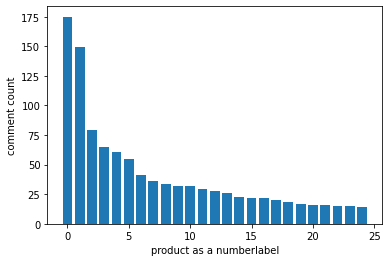

In [ ]:
plt.bar(creme_la_creme_review.null_comment_count,creme_la_creme.item_link )
plt.ylabel('comment count')
plt.xlabel('product as a numberlabel')

In [ ]:
#df['review_date']= pd.DataFrame(df['review_date'].str.split(' ',2).tolist(),columns = ['month','day','month'])